# Многокритериальная оптимизация

> — Я только что думал...   
> — Очаровательное занятие, мой друг. Не гнушайтесь им и впредь.
> > Агата Кристи. Загадка Эндхауза.

# Задача о движении тележки

    Постановка задачи

Пусть имеется тележка, которая движется без трения под действием ограниченной внешней силы. Требуется к заданному наперед моменту времени $T$ перевести рассматриваемый объект из начального положения $x_0 = (3, 2)$ как можно ближе к наперед заданному положению $x_T=(0,0)$ при помощи допустимого управления $u(t)$, затратив при этом как можно меньше энергии.

Иными словами, требуется решить задачу многокритериальной оптимизации

$$ J(u)=\left((x_1(T))^2+(x_2(T))^2, \int\limits_{0}^T u^2(t)dt\right) \to Smin $$

где $x(t)=(x_1(t), x_2(t))$ -- положение и скорость тележки в момент времени $t$ удовлетворяет условиям

\begin{cases}
\dot x_1(t) = x_2(t)+u_1(t)\\
\dot x_2(t) = u_2(t), \quad x_1(0) = 3, \; x_2(0) = 2 , \; 0 \leqslant t \leqslant T, \\
u(\cdot) \in U=\{u(t) \in L_2(0,T): \; u_1(t)=0,\; |u_2(t)| \leqslant 1\}
\end{cases}



    Замечание: Рассмотрите случаи


+ $T=t_*$
+ $T > t_*$
+ $T < t_*$
 
 где $t_* = 2+\sqrt{5}$

### В качестве отчета о проделанной работе необходимо будет прислать файл, содержащий

+ 1. Иллюстрацию работы алгоритма (графики зависимости функционала от итерации, переменных от итерации, самого управления и.т.п.), то есть показать, что алгоритм сходится к решению задачи

+ 2. Таблицу сравнения работы метода (по количеству итераций, времени работы) при разном выборе шага, начального приближения, метода останова и.т.п.
 
+ Также необходимо будет приложить код программы

## Литература

Васильев Ф.П. Методы оптимизации. М:МЦНМО, 2011.

Киселев Ю.Н., Аввакумов С.Н., Орлов М.В. Оптимальное управление. Линейная теория и приложения. М: МАКС Пресс, 2007.

## Определение точки лучшей по Слэйтеру $ %\prec$ $%\succ$  
Будем говорить x лучше чем y по Слэйтеру ($x \prec y$), если выполняется
$$ f_i(x) < f_i(y), \: \forall i $$

так как $U_1 = 0$, решаем второе уравнение системы 

$$x_2(t) = \int\limits_{0}^{t} u_2(t)dt + 2,   \qquad (x_2(0) = 2)$$

$$x_1(t)  = \int\limits_{0}^{t} x_2(t) dt + 3 = \int\limits_{0}^{t}\int\limits_{0}^{t} u_2(t) dt^2 + 2t +3, \qquad (x_1(0) = 3)$$



Вместо интегралов введём их аппроксимацию с помощью трапеций

$$J(u)=\left((x_1(T))^2+(x_2(T))^2, \int\limits_{0}^T u^2(t)dt\right) $$

$$\text{Будем считать что вектор} \overrightarrow{e} = (0.5, 1.0, 1.0, ..., 1.0, 0.5)$$

$$ x_2(T) = \tau*(\overrightarrow{e}, u_2) + 2, \frac{d x_2(T)}{d u_2} = \tau*\overrightarrow{e} $$

$$ x_1(T) = \tau*(\overrightarrow{e}, x_2(t)) + 3 = \tau^2*(Au_2,\overrightarrow{e}) + 3, \\ \text{где A - треугольная матрица особого вида.} $$

$$ \frac{d x_1(T)}{d u_2} = \tau^2 * (A,\overrightarrow{e}) $$

$$ \int\limits_{0}^T u^2(t)dt = \tau*(u^2_2,\overrightarrow{e}) $$

$$ \frac{d (u_2, u_2)}{d u_2} = \tau*2*u_2 $$




$$ \frac{d J(u_2)}{d u_2} = \alpha*
(2\tau^2(\tau^2 (Au_2,\overrightarrow{e}) + 3)(A,\overrightarrow{e}) 
+ 
2 \tau (\tau (\overrightarrow{e}, u_2) + 2)\overrightarrow{e}   ) 
+ (1- \alpha)*(2 \tau u_2)$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [ ]:
def F1(u, N, tau, T, A, e):
    x_1T = tau*tau*np.dot(np.dot(A, u), e) + 2.0*T + 3.0
    x_2T = tau*np.dot(u, e) + 2.0
    return x_1T*x_1T + x_2T*x_2T

In [ ]:
def F2(u, N, tau, e):
    return tau*np.dot(u*u, e)

In [ ]:
def conv_J(u, tau, T, alpha, N, A, e):
    x_1T = tau * tau * np.dot(np.dot(A, u), e) + 2.0*T + 3.0
    x_2T = tau * np.dot(u, e) + 2.0
    return alpha*(x_1T*x_1T + x_2T*x_2T) + (1.0 - alpha)*(tau*np.dot(u*u, e))

In [ ]:
def grad_J(u, tau, alpha, N, A, e):
    left = 2 * (tau*tau*np.dot(np.dot(A, u), e) + 3.0) * tau*tau*np.dot(A, e) + 2 * (tau*np.dot(u, e) + 2.0) * tau * e
    right = 2 * tau * u
    return alpha*left + (1.0 - alpha)*right

In [ ]:
def my_minimize(N, tau, T, alpha, A, e):
    const = -2.5 / float(N)
    u0 = np.array([const] * N)
    #u0 = np.array([   2.0*i/float(N-1) - 1.0     for i in range(0, N)])
    my_args = (tau, T, alpha, N, A, e)
    # Only for CG, BFGS, Newton-CG, L-BFGS-B, TNC, SLSQP, dogleg, trust-ncg, trust-krylov, trust-exact and trust-constr.
    res = minimize(conv_J, u0, method='BFGS', args=my_args, options={'disp': False}) #'disp': True   jac=grad_J,
    return res.x

In [ ]:
def minimize_with_parameters(N, T, tau, NumAlpha):
    e = np.array([0.5 if i == 0 or i == N-1 else 1.0 for i in range(0, N)])
    A = np.array([[1.0 if i > j else 0.0 for j in range(0, N)] for i in range(0, N)])
    #A[0, 0] = 1.0
    for i in range(1, N):
        A[i, 0] = 0.5
        A[i, i] = 0.5
    
    alpha_mass = np.linspace(0.0, 1.0, NumAlpha)
    u_mass = []
    for alpha in alpha_mass:
        u = my_minimize(N, tau, T, alpha, A, e)
        u_mass.append(u)
    return u_mass

In [ ]:
def get_F_values(U, N, tau, T):
    e = np.array([0.5 if i == 0 or i == N-1 else 1.0 for i in range(0, N)])
    A = np.array([[1.0 if i > j else 0.0 for j in range(0, N)] for i in range(0, N)])
    for i in range(1, N):
        A[i, 0] = 0.5
        A[i, i] = 0.5
    F1val, F2val = [], []
    for u in U:
        F1val.append(F1(u, N, tau, T, A, e))
        F2val.append(F2(u, N, tau, e))
    return (F1val, F2val)

## TESTS

На графиках где много точек показывается что точки полученные нами не противоречят условию Слэйтера. Так же показываются некоторые оптимальные управления для разных лямбда. 


In [ ]:
num_alpha = 100
tau = 0.01

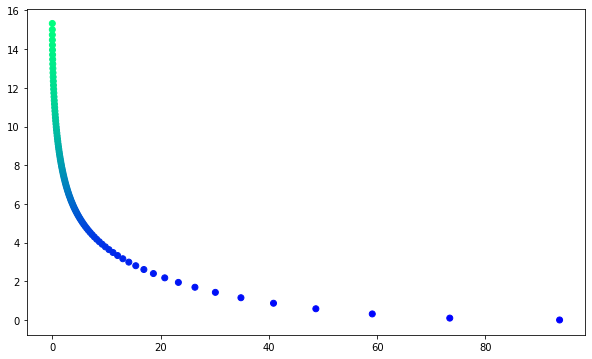

In [ ]:
T1 =  1.0 + 5**0.5
N1 = int(T1/tau)
res1 = minimize_with_parameters(N1, T1, tau, num_alpha)

f_values_mass = get_F_values(res1, N1, tau, T1)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(f_values_mass[0], f_values_mass[1], cmap='winter', c=[i*(1.0/float(num_alpha-1)) for i in range(0, num_alpha)])
#ax.scatter(f_values_mass[0][80:], f_values_mass[1][80:])

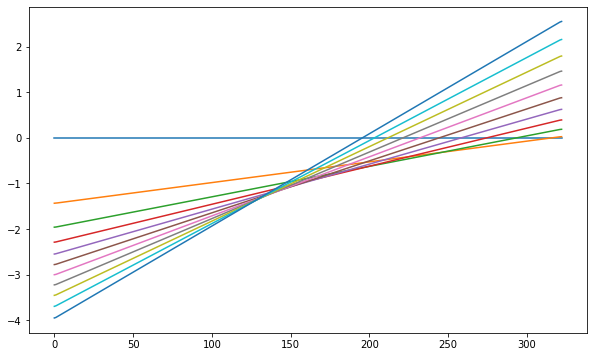

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in [i*9 for i in range(0, 11)]:
    ax.plot(res1[i])

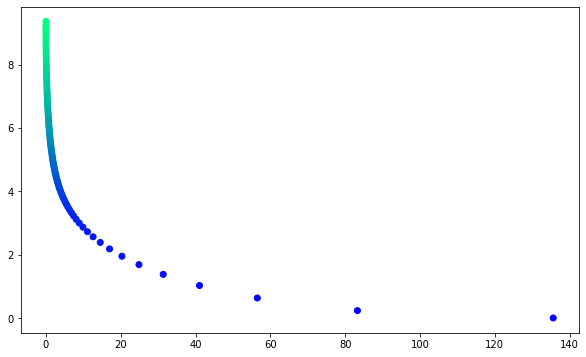

In [ ]:
T2 =  2.0 + 5**0.5
N2 = int(T2/tau)
res2 = minimize_with_parameters(N2, T2, tau, num_alpha)

f_values_mass = get_F_values(res2, N2, tau, T2)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(f_values_mass[0], f_values_mass[1], cmap='winter', c=[i*(1.0/float(num_alpha-1)) for i in range(0, num_alpha)])
#ax.scatter(f_values_mass[0][80:], f_values_mass[1][80:])

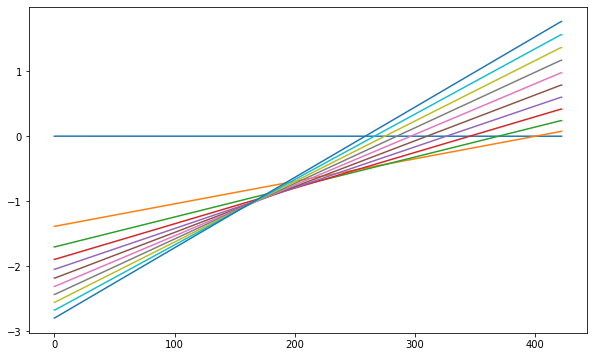

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in [i*9 for i in range(0, 11)]:
    ax.plot(res2[i])

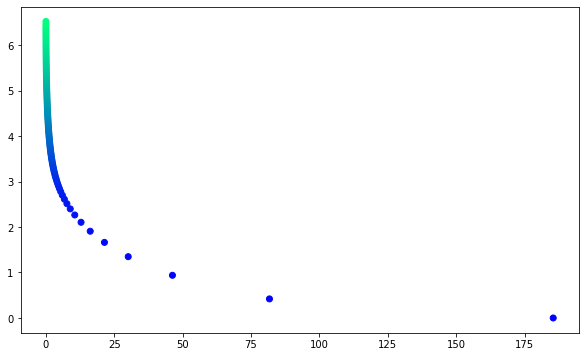

In [ ]:
T3 =  3.0 + 5**0.5
N3 = int(T3/tau)
res3 = minimize_with_parameters(N3, T3, tau, num_alpha)

f_values_mass = get_F_values(res3, N3, tau, T3)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(f_values_mass[0], f_values_mass[1], cmap='winter', c=[i*(1.0/float(num_alpha-1)) for i in range(0, num_alpha)])
#ax.scatter(f_values_mass[0][80:], f_values_mass[1][80:])

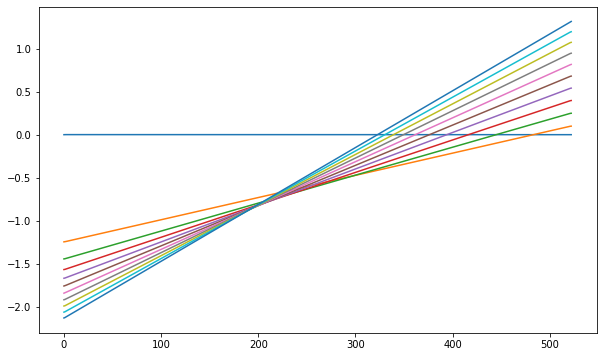

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in [i*9 for i in range(0, 11)]:
    ax.plot(res3[i])

alpha =  0.5050505050505051


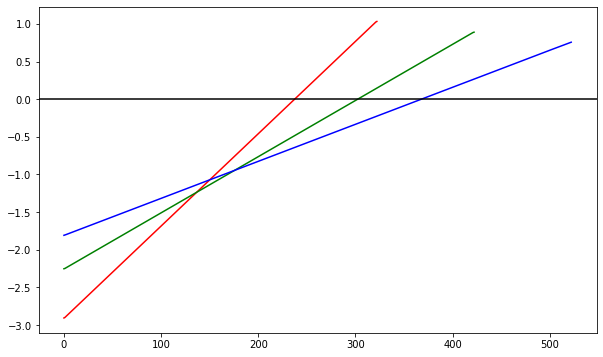

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
j = 50;
print('alpha = ', np.linspace(0.0, 1.0, num_alpha)[j])
ax.plot(res1[j], color='red')
ax.plot(res2[j], color='green')
ax.plot(res3[j], color='blue')
ax.axhline(y=0, color='black')
plt.show()

здесь видно зависимость оптимального управления от количества имеющегося времени 

In [ ]:
def get_x1_value(u, N, tau, T):
    x1_mass = [3.0]
    for k in range(1, N):
        tmp_e = np.array([0.5 if i == 0 or i == N-1 else 1.0 for i in range(0, k+1)])
        tmp_A = np.array([[1.0 if i > j else 0.0 for j in range(0, k+1)] for i in range(0, k+1)])
        for r in range(1, k+1):
            tmp_A[r, 0] = 0.5
            tmp_A[r, r] = 0.5
        x1_mass.append(tau*tau*np.dot(np.dot(tmp_A, u[0:k+1]), tmp_e) + 2.0*k*tau + 3.0)
    return np.array(x1_mass)
def get_x2_value(u, N, tau):
    x2_mass = [2.0]
    for k in range(1, N):
        tmp_e = np.array([0.5 if i == 0 or i == N-1 else 1.0 for i in range(0, k+1)])
        x2_mass.append(tau*np.dot(u[0:k+1], tmp_e) + 2.0)
    return np.array(x2_mass)


## Покажем частные решения при некоторых лямбда.
В начальный момент времени тележка ехала в обратную сторону от нуля с некоторой скоростью. Оба параметра надо минимизировать. Синей линеей видна позиция тележки. Видно что сначала ее необходимо развернуть а потом приблизить к 0.
Красным показана скорость которую мы придаём каждый момент времени. 

Управления получаемы при ламбда равными 1 и 0 получаются очень разрывными, на краях сильные скачки. Это связано с тем, что мы минимизируем только один из функционалов и у нас теряется гладкость так как выгодно сразу уменьшить положение тележки и ее скорость 


(323,)
(323,)


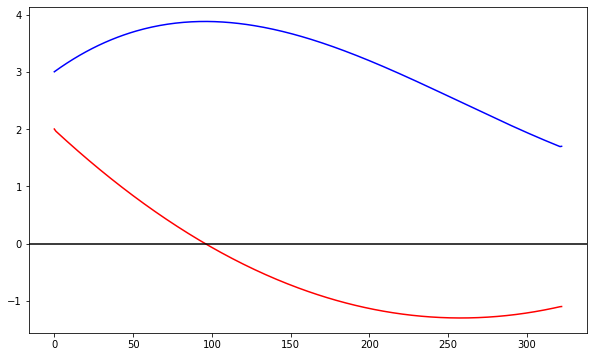

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
k=36
ax.plot(get_x1_value(res1[k], N1, tau, T1), color='blue')
ax.plot(get_x2_value(res1[k], N1, tau), color='red')
ax.axhline(y=0, color='black')
print(get_x1_value(res1[k], N1, tau, T1).shape)
print(res1[k].shape)

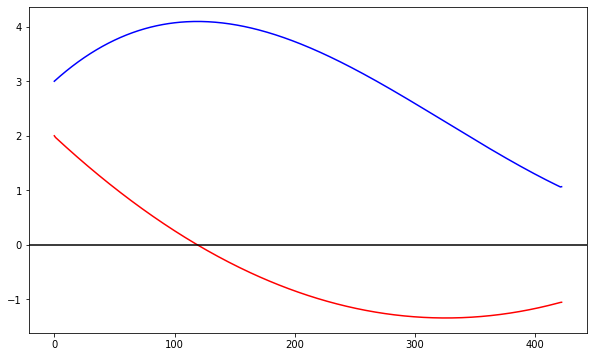

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
k=36
ax.plot(get_x1_value(res2[k], N2, tau, T2), color='blue')
ax.plot(get_x2_value(res2[k], N2, tau), color='red')
ax.axhline(y=0, color='black')


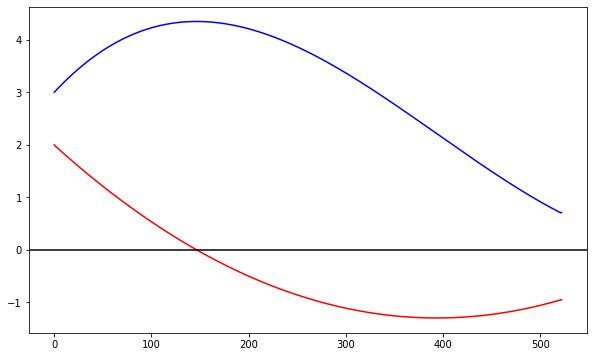

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
k = 36
ax.plot(get_x1_value(res3[k], N3, tau, T3), color='blue')
ax.plot(get_x2_value(res3[k], N3, tau), color='red')
ax.axhline(y=0, color='black')


## Задача с очень маленьким временем 

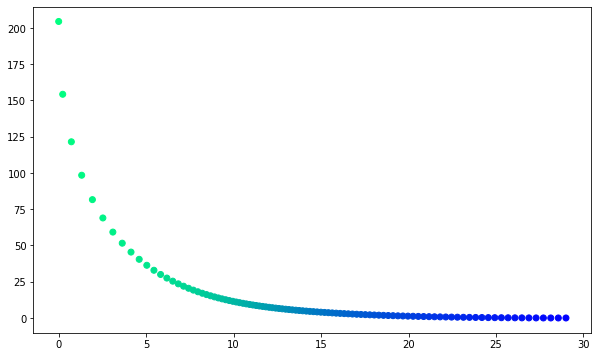

In [ ]:
T4 =  1.0
N4 = int(T4/tau)
res4 = minimize_with_parameters(N4, T4, tau, num_alpha)

f_values_mass = get_F_values(res4, N4, tau, T4)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(f_values_mass[0], f_values_mass[1], cmap='winter', c=[i*(1.0/float(num_alpha-1)) for i in range(0, num_alpha)])

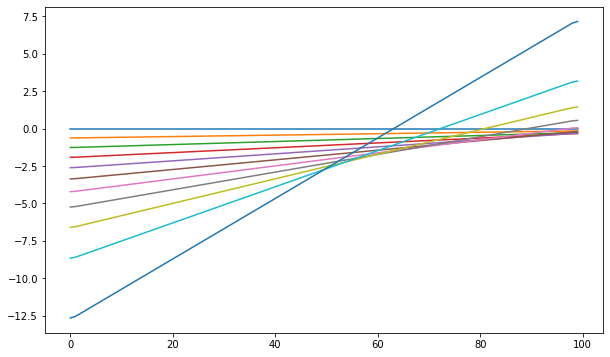

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in [i*9 for i in range(0, 11)]:
    ax.plot(res4[i])

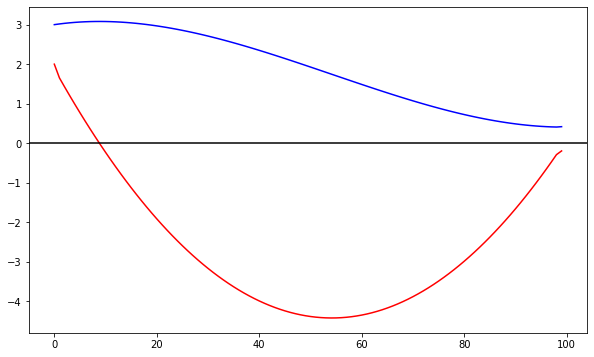

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
k = 98
ax.plot(get_x1_value(res4[k], N4, tau, T4), color='blue')
ax.plot(get_x2_value(res4[k], N4, tau), color='red')
ax.axhline(y=0, color='black')
